In [1]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score

In [2]:
rbs = pd.read_csv('../Capstone_csv_file/rbs_att_g_salary_17-18')

In [3]:
rbs.dtypes

NAME           object
ATT/G         float64
ATT/G_rank    float64
salary          int64
dtype: object

In [4]:
rbs.head()

,NAME,ATT/G,ATT/G_rank,salary
0,Ezekiel Elliott,24.2,1.0,6239085
1,Le'Veon Bell,21.4,2.0,12120000
2,Leonard Fournette,20.6,3.0,6787711
3,Todd Gurley,18.6,4.0,3455796
4,Dalvin Cook,18.5,5.0,1588334


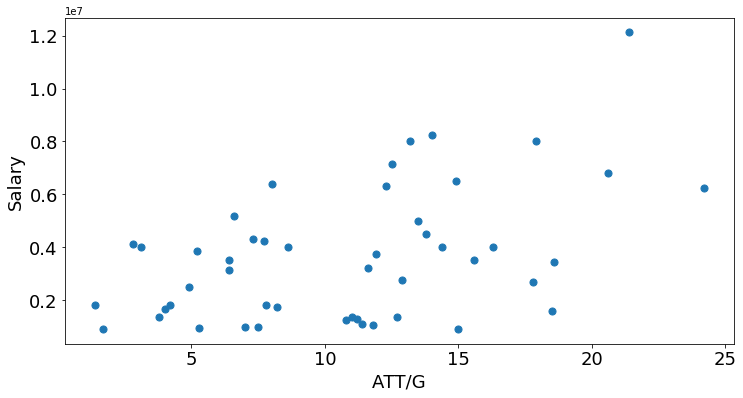

In [5]:
ax = rbs.plot(kind="scatter", x = 'ATT/G',  y = 'salary', figsize = (12,6), s = 50)
plt.xlabel('ATT/G', fontsize=18)
plt.ylabel("Salary", fontsize=18)
ax.tick_params(axis='both', which='major', labelsize=18)

In [6]:
ss = StandardScaler()
X = ss.fit_transform(rbs.loc[:, ['ATT/G', 'salary']])

In [7]:
X.mean(axis = 0)

array([-2.96059473e-16, -8.78926561e-17])

In [8]:
X.std(axis = 0)

array([1., 1.])

In [9]:
km = KMeans(n_clusters = 5, random_state = 27)
km.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=27, tol=0.0001, verbose=0)

In [10]:
km.cluster_centers_

array([[-0.84159463,  0.25282386],
       [ 0.88558655, -0.01816477],
       [ 0.16086942, -0.83163785],
       [ 1.10222506,  1.64532346],
       [-1.10830525, -0.88562884]])

In [11]:
km.predict(X)

array([3, 3, 3, 1, 1, 3, 1, 1, 1, 2, 3, 1, 3, 1, 1, 3, 2, 2, 3, 3, 1, 2,
       2, 2, 2, 2, 2, 0, 2, 0, 4, 0, 4, 0, 4, 0, 0, 0, 4, 0, 4, 4, 4, 4,
       0, 0, 4, 4], dtype=int32)

In [12]:
rbs['clusters'] = km.labels_
rbs.head()

,NAME,ATT/G,ATT/G_rank,salary,clusters
0,Ezekiel Elliott,24.2,1.0,6239085,3
1,Le'Veon Bell,21.4,2.0,12120000,3
2,Leonard Fournette,20.6,3.0,6787711,3
3,Todd Gurley,18.6,4.0,3455796,1
4,Dalvin Cook,18.5,5.0,1588334,1


In [13]:
ss.inverse_transform(km.cluster_centers_)

array([[6.21000000e+00, 4.27470600e+06],
       [1.56000000e+01, 3.60684144e+06],
       [1.16600000e+01, 1.60199780e+06],
       [1.67777778e+01, 7.70658844e+06],
       [4.76000000e+00, 1.46893440e+06]])

In [14]:
rbs.groupby('clusters')[['ATT/G', 'salary']].mean()

,ATT/G,salary
clusters,,
0,6.210000,4.274706e+06
1,15.600000,3.606841e+06
2,11.660000,1.601998e+06
3,16.777778,7.706588e+06
4,4.760000,1.468934e+06


In [15]:
centroids = rbs.groupby('clusters')[['ATT/G', 'salary']].mean()

<Figure size 504x504 with 0 Axes>

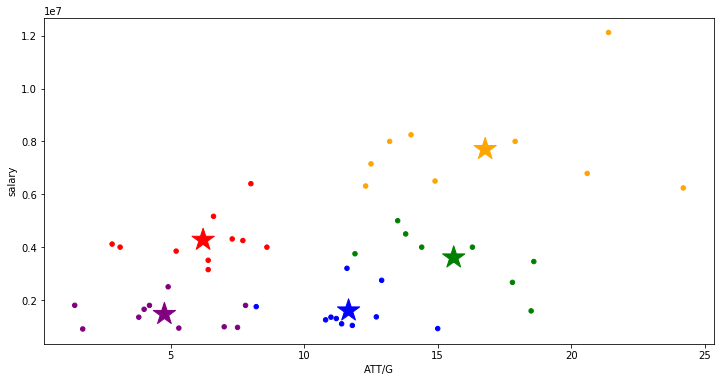

In [16]:
plt.figure(figsize = (7,7));

colors = ['red', 'green', 'blue', 'orange', 'purple']
rbs['color'] = rbs['clusters'].map(lambda p: colors[p])

ax = rbs.plot(    
    kind = 'scatter', 
    x = 'ATT/G', y = 'salary',
    figsize = (12,6),
    c = rbs['color']
);

centroids.plot(
    kind = 'scatter', 
    x = 'ATT/G', y = 'salary', 
    marker = '*', c = colors, s = 550,
    ax = ax
);

In [17]:
km.inertia_

18.616945359579997

In [18]:
silhouette_score(X, km.labels_)

0.4010836744435653